1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

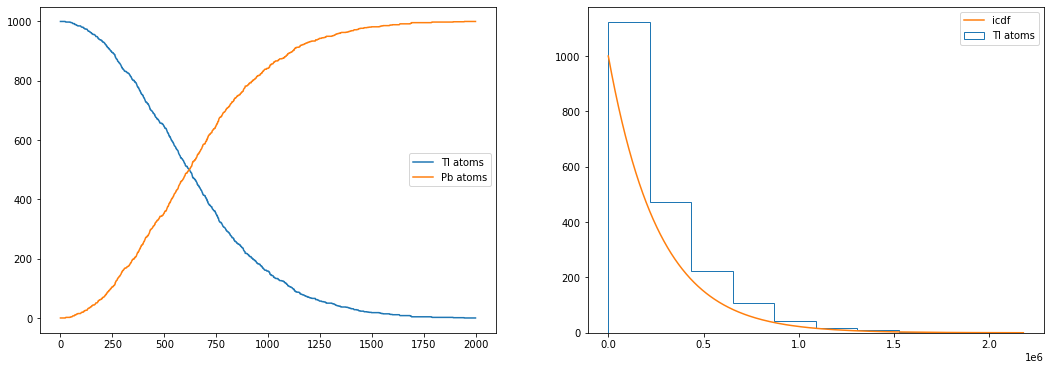

In [9]:
import numpy as np
import matplotlib.pyplot as plt

tau = 3052*60 

N = 1000

tl_atoms = [N]
pb_atoms = [0]

def p(t):
    return 1 - 2**(-t/tau)

N_steps = 2000

for t in range(1, N_steps):

    atoms = np.random.random(tl_atoms[-1])
    
    decayed = np.sum(atoms < p(t)) 
    
    tl_atoms.append(tl_atoms[-1] - decayed)
    pb_atoms.append(pb_atoms[-1] + decayed)
    

fig, axes = plt.subplots(1, 2, figsize = (18,6))

axes[0].plot(tl_atoms)
axes[0].plot(pb_atoms)
axes[0].legend(["Tl atoms", "Pb atoms"])
                
def icdf(x):
    return -tau*np.log2(1 - x) 

u = np.random.random(N_steps)
v = icdf(u)
axes[1].hist(v, histtype='step')
axes[1].plot(np.sort(icdf(u)), (1 - (np.sort(u)))*N)
axes[1].legend(["icdf", "Tl atoms"])

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [12]:
E = 7.7 * 1.60218e-13

# bohr radius
a_0 = 5.29e-11 

# std gaussian
sigma = a_0/100

# n of alpha particles
n_a = int(1e6) 

# vacuum permittivity
eps_0 = 8.85e-12 

# gold atom
Z = 79 

# electron charge culomb
e = -1.6e-19 

# 2d gaussian with Box-Muller
z = np.random.random(n_a)
theta_g = 2*np.pi*np.random.random(n_a)
r = np.sqrt(-2*np.log(z))
x = r*np.cos(theta_g)*sigma
y = r*np.sin(theta_g)*sigma
 
# compute distance from center
b = np.array(np.linalg.norm(np.array(list(zip(x, y))), axis=1)) 

# compute the angle of the particles
theta = 2*np.arctan((Z*e**2)/(2*np.pi*eps_0*E*b)) 

# fraction of particles that "bounce back"
fraction_bb = np.sum(theta > np.pi/2)/n_a 

print(f"The fraction of particle that bounced back are: {fraction_bb}")

The fraction of particle that bounced back are: 0.001583


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [13]:
def f(x):
    return (np.sin(1/(x*(2 - x))))**2

b = 2
a = 0
N = 10000

# Hit/Miss Method
    
x = (b - a)*np.random.random(N)
y = np.random.random(N)
I_hm = (b - a)*np.sum(f(x) > y)/N

# Mean Value Method

x = 2*np.random.random(N)
I_mean = (b - a)*np.sum(f(x))/N

print(f"Integral with hit miss value:   {I_hm}")
print(f"Integral with mean value:       {I_mean}")

# Evaluate error
x = np.linspace(a, b, N)[1:-1]
I = np.trapz(f(x) ,x)

print(f"Integral with trapz:            {I}")
print(f"Error hit/miss:                 {np.abs(I-I_hm)}")
print(f"Error mean value:               {np.abs(I-I_mean)}")

print("In this case we can see that error with the hit/miss method is bigger than the error with the mean value method")

Integral with hit miss value:   1.4426
Integral with mean value:       1.4543787792966543
Integral with trapz:            1.4513617303034878
Error hit/miss:                 0.008761730303487703
Error mean value:               0.00301704899316646
In this case we can see that error with the hit/miss method is bigger than the error with the mean value method


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [14]:
def f(x):
    return np.sum(x**2, axis=0) <= 1

def I(dim):
    x = np.random.uniform(low=-1., high=1., size=(dim, N))
    return 2**dim*np.sum(f(x))/N

N = 1000000

print(f"Integral circle:            {I(2)}")
print(f"Integral 10D sphere:        {I(10)}")

Integral circle:            3.141756
Integral 10D sphere:        2.572288


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [15]:
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

N = 100000

# compute I_w with mean value method
x0 = np.random.random(N)
I_w = np.sum(w(x0))/N

# importance sampling
x1 = np.random.uniform(0, 1, N)**2
I = (1/N)*np.sum(f(x1)/w(x1))*I_w

print(f"The integral value is {I}")

The integral value is 0.8313549564813629
